In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.neighbors import LocalOutlierFactor


In [30]:
#Cargar base de datos integrada que contiene las variables concideradas boya calidad de agua y estación Meteorologica 
bd_integrada = pd.read_excel("bd_integrada.xlsx")
len(bd_integrada)

10665

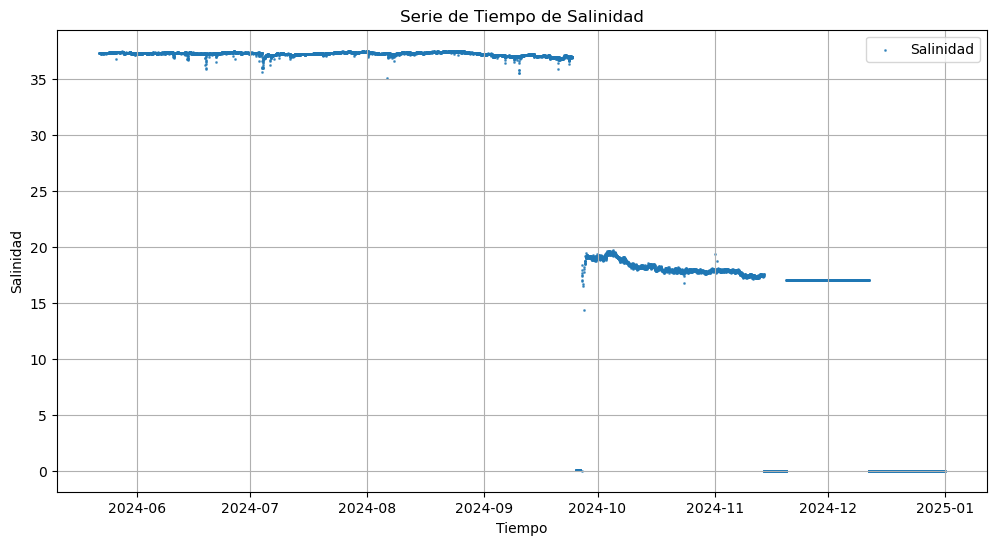

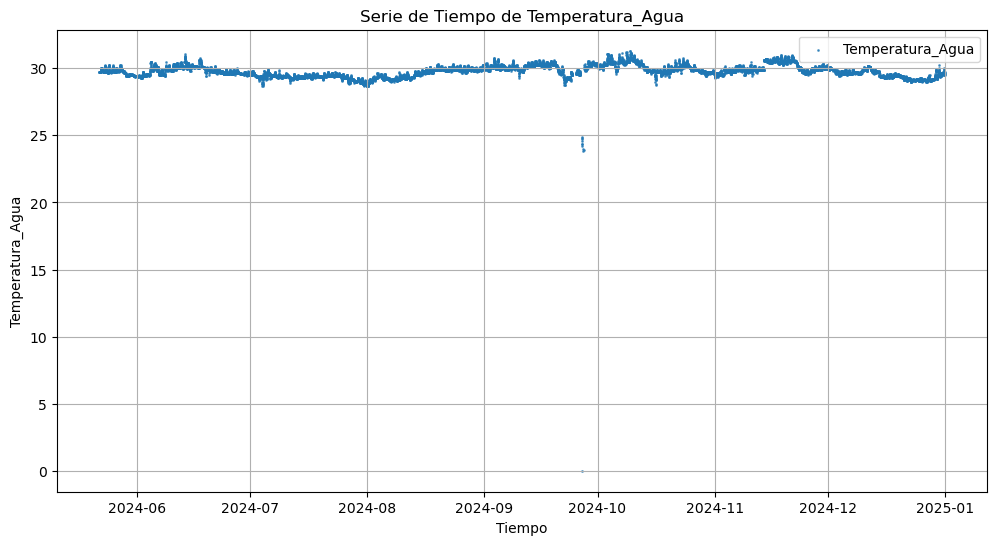

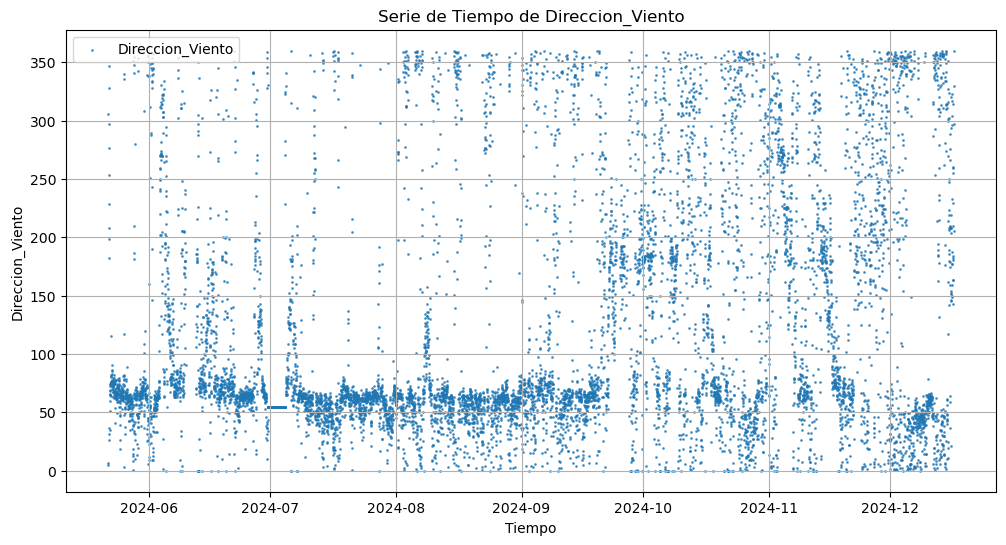

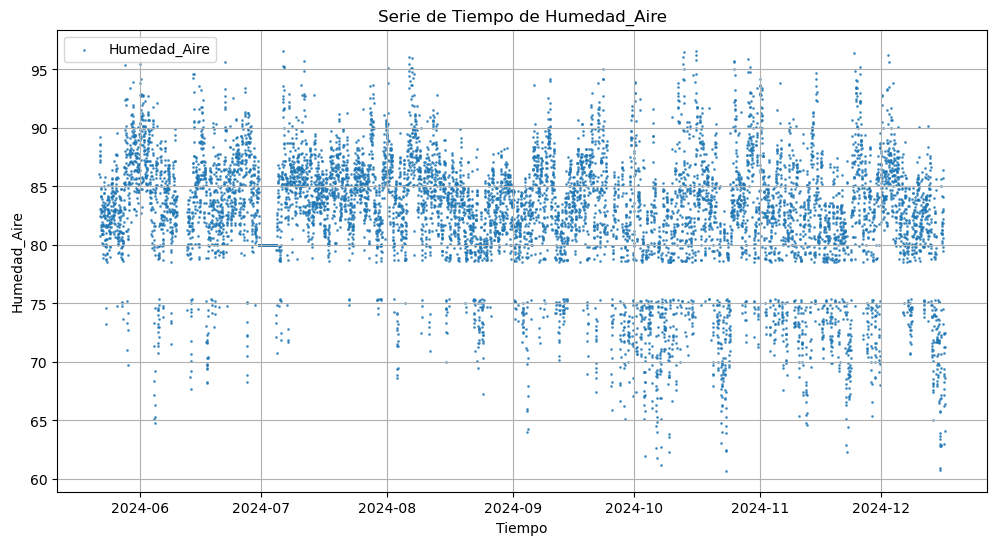

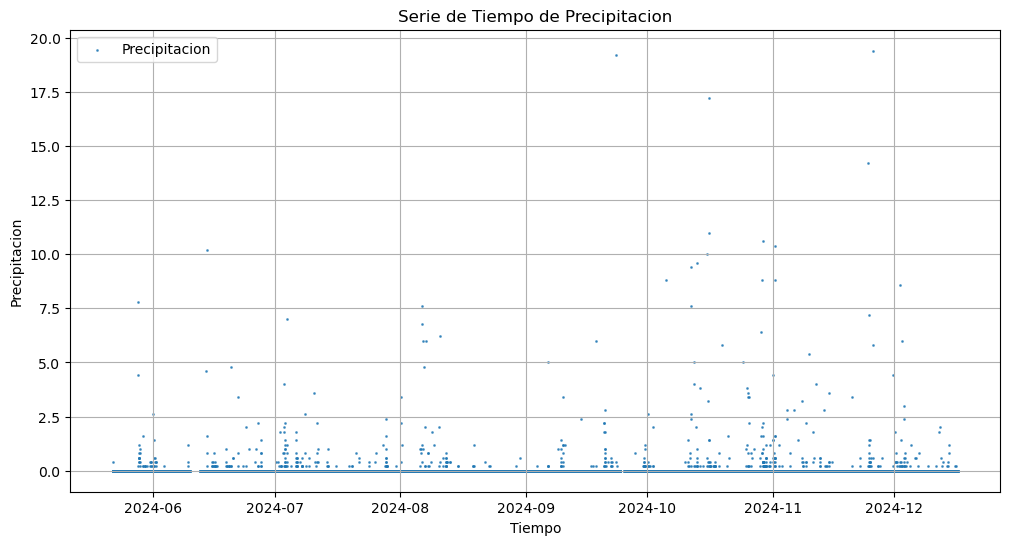

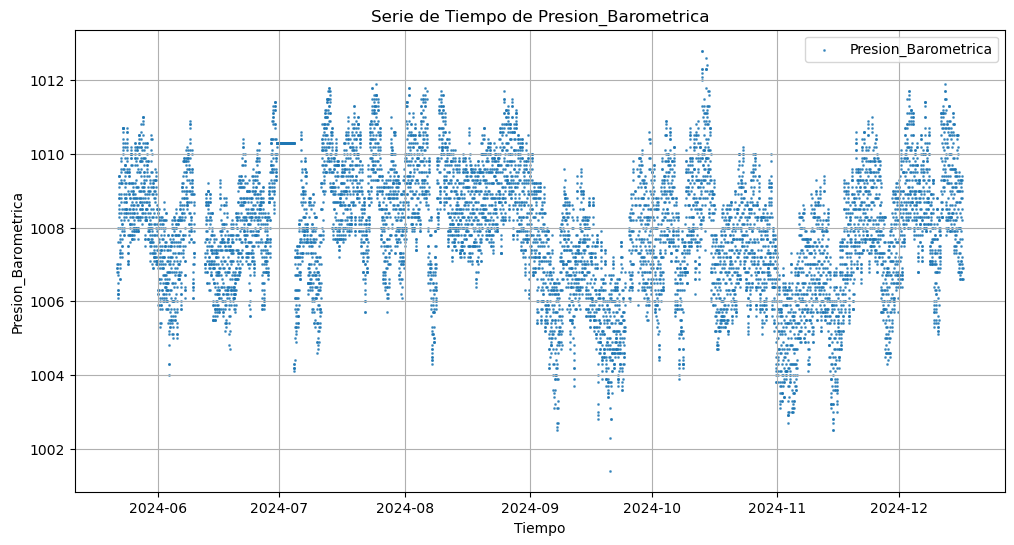

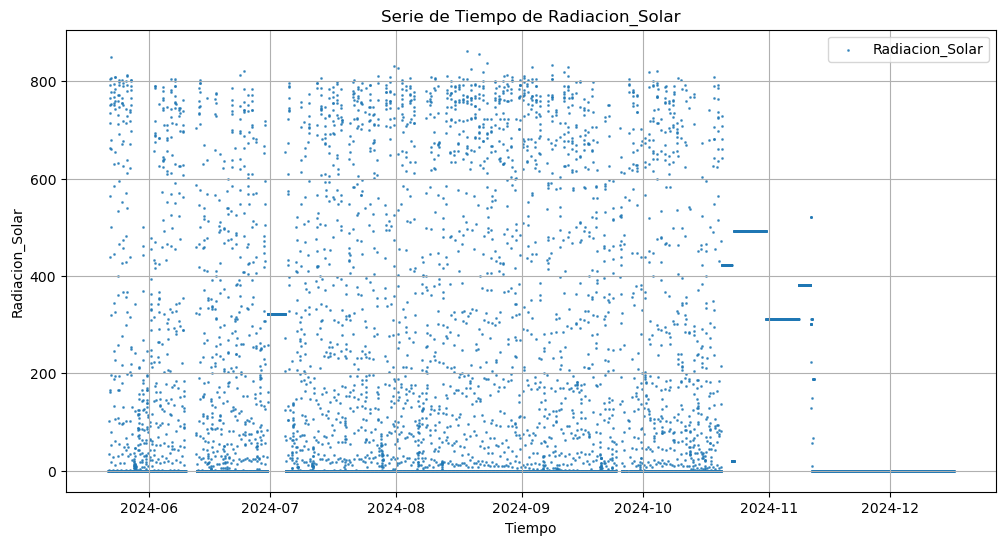

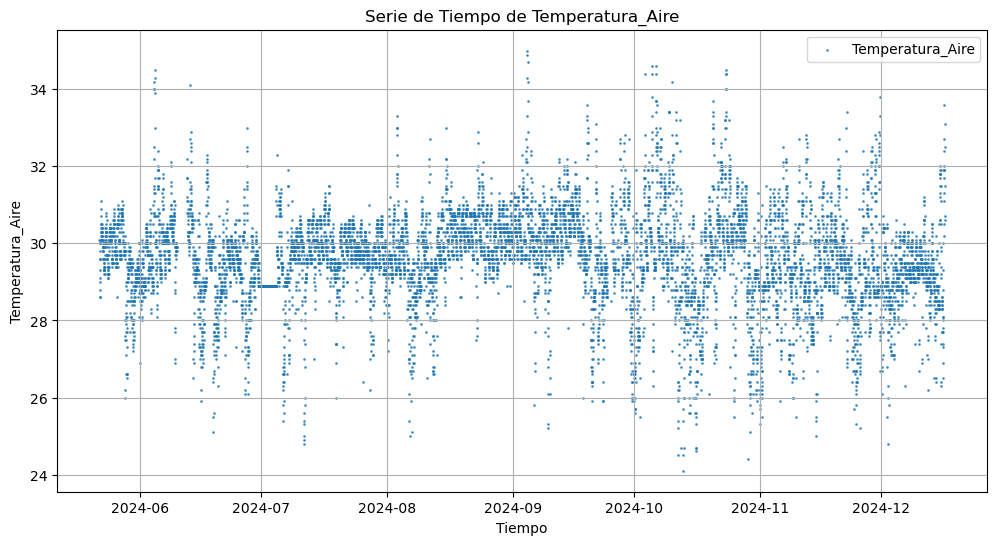

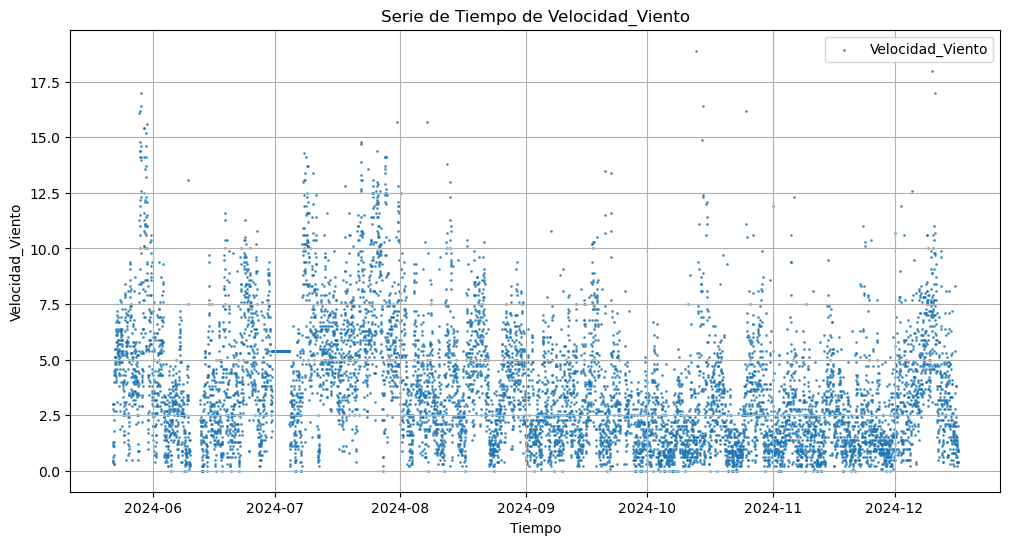

In [31]:
#Un primer vistazo para explorar las variables 
# Convertir la columna de tiempo a tipo datetime
bd_integrada['Tiempo'] = pd.to_datetime(bd_integrada['Tiempo'])

# Graficar cada variable individualmente con puntos muy pequeños
for column in bd_integrada.columns[1:]:  # Omitir la columna de tiempo
    plt.figure(figsize=(12, 6))
    plt.scatter(bd_integrada['Tiempo'], bd_integrada[column], s=1, alpha=0.7, label=column)  # Puntos más pequeños
    plt.xlabel('Tiempo')
    plt.ylabel(column)
    plt.title(f'Serie de Tiempo de {column}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [32]:



# Modificar la variable Salinidad: valores menores a 25 se convierten en NaN
bd_integrada.loc[bd_integrada["Salinidad"] < 25, "Salinidad"] = np.nan

# Modificar la variable Temperatura_Agua: valores menores a 26 se convierten en NaN
bd_integrada.loc[bd_integrada["Temperatura_Agua"] < 26, "Temperatura_Agua"] = np.nan

# Modificar las demás variables: valores repetidos más de 4 veces consecutivos (excepto ceros) se convierten en NaN
for column in bd_integrada.columns:
    if column not in ["Salinidad", "Temperatura_Agua", "Tiempo"]:  # Excluir variables ya modificadas y el tiempo
        # Identificar los grupos de valores consecutivos
        consecutive_counts = (bd_integrada[column] != bd_integrada[column].shift()).cumsum()

        # Aplicar la transformación sin afectar valores iguales a 0
        bd_integrada[column] = bd_integrada.groupby(consecutive_counts)[column].transform(
            lambda x: np.nan if (len(x) > 3 and not (x.iloc[0] == 0.0)) else x
        )

# Guardar el archivo modificado
bd_integrada.to_excel("bd_modificada.xlsx", index=False)

print("Archivo modificado guardado como 'bd_modificada.xlsx'")



Archivo modificado guardado como 'bd_modificada.xlsx'


In [36]:
valores_nulos = bd_modificada.isna().sum()

# Mostrar los valores nulos por variable
print("Cantidad de valores nulos por variable:")
print(valores_nulos)

Cantidad de valores nulos por variable:
Tiempo                    0
Salinidad              4647
Temperatura_Agua         11
Direccion_Viento       1063
Humedad_Aire           1063
Precipitacion           868
Presion_Barometrica    1126
Radiacion_Solar        2131
Temperatura_Aire       1652
Velocidad_Viento       1063
dtype: int64


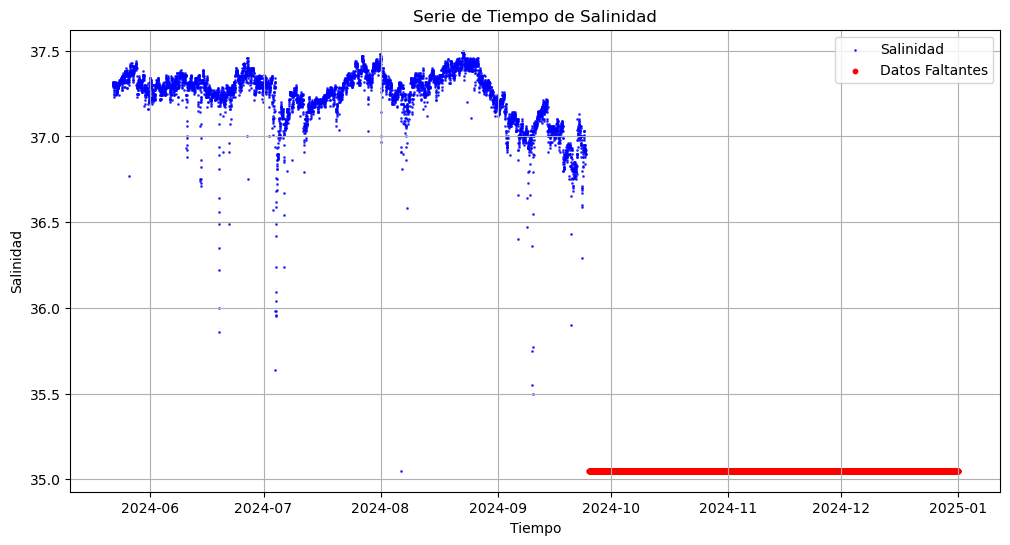

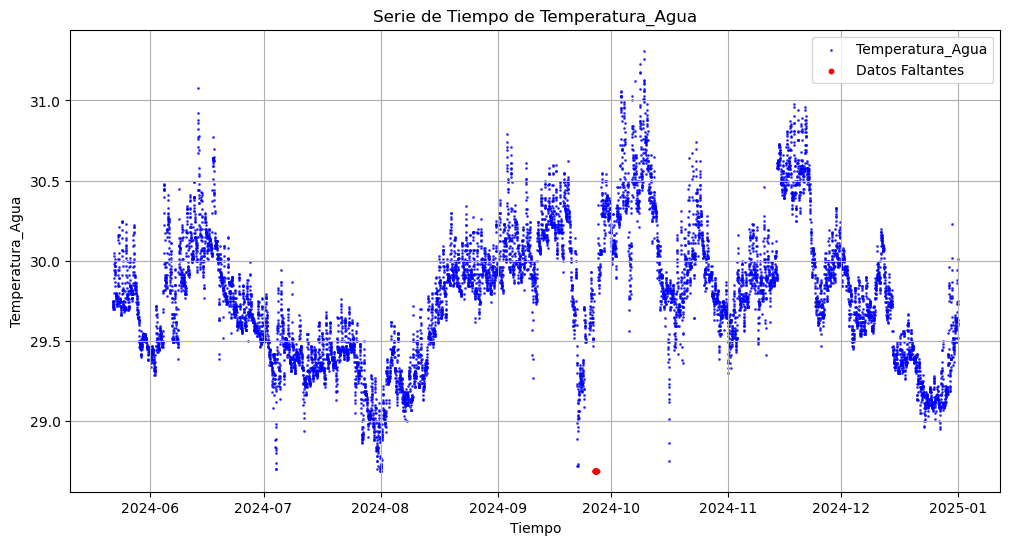

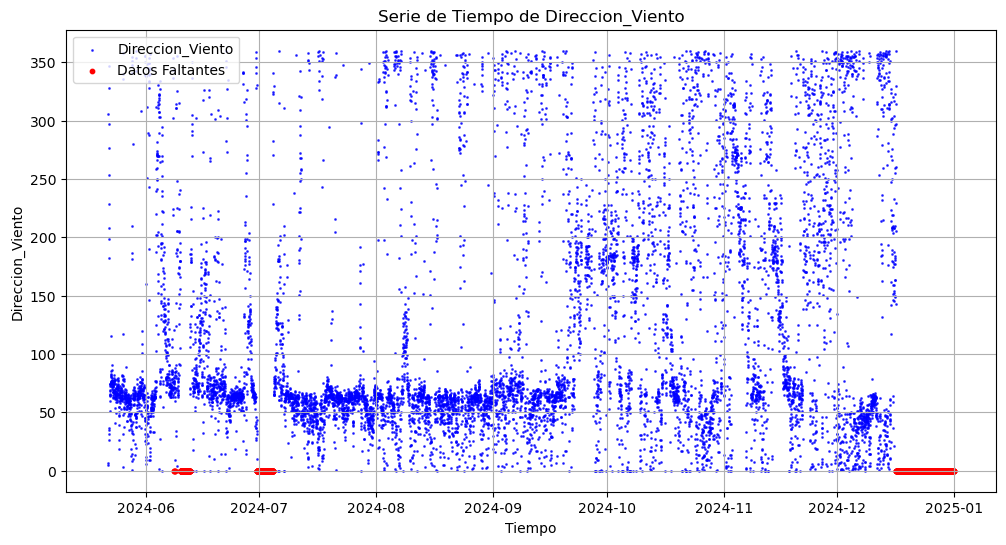

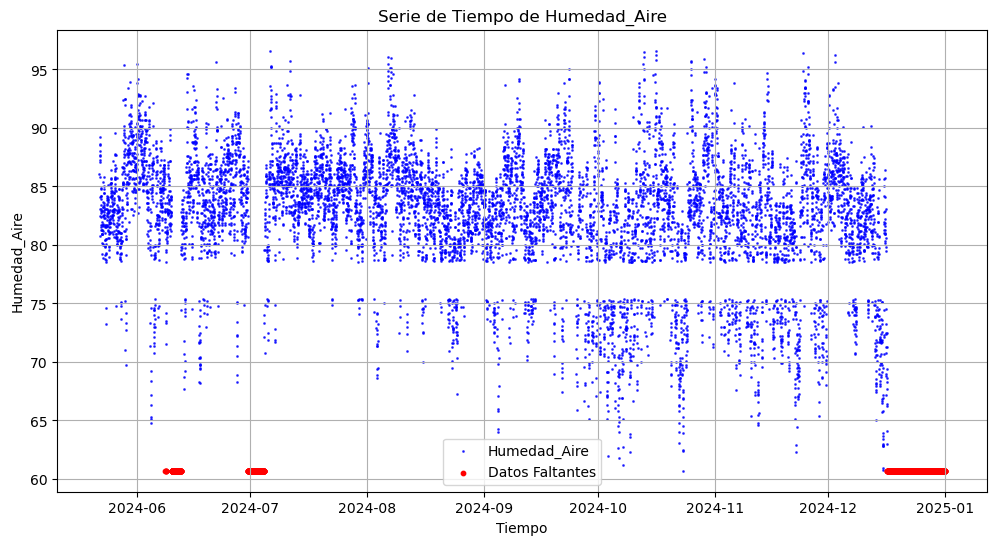

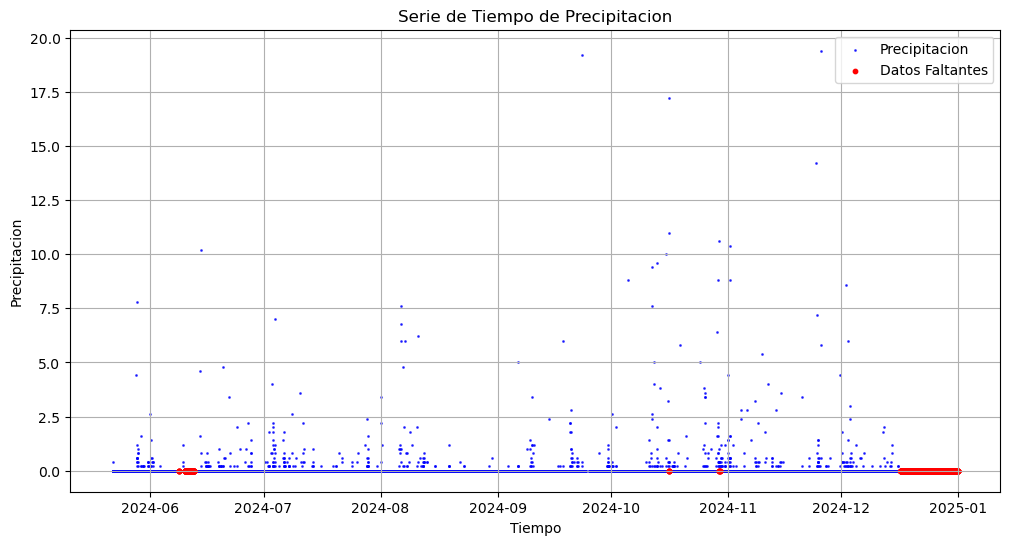

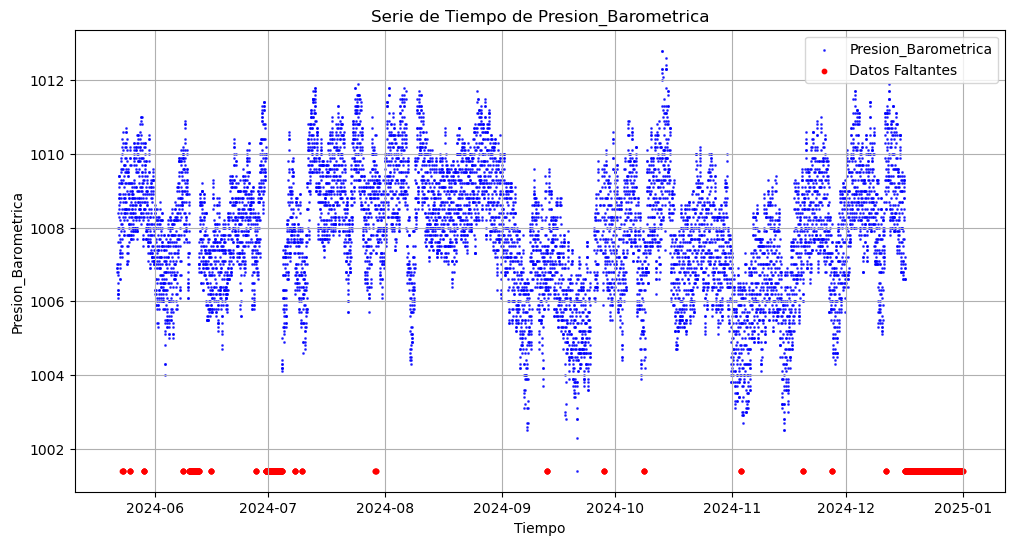

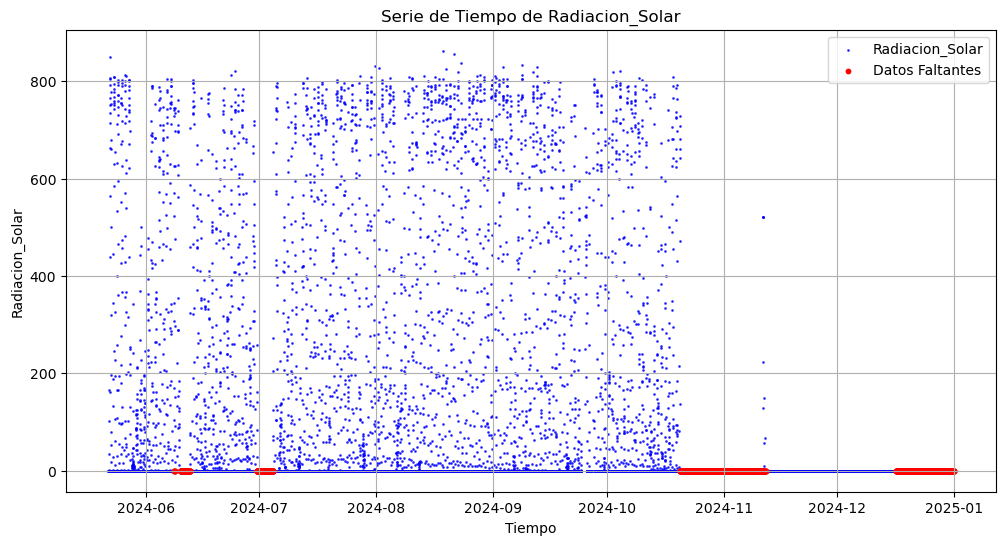

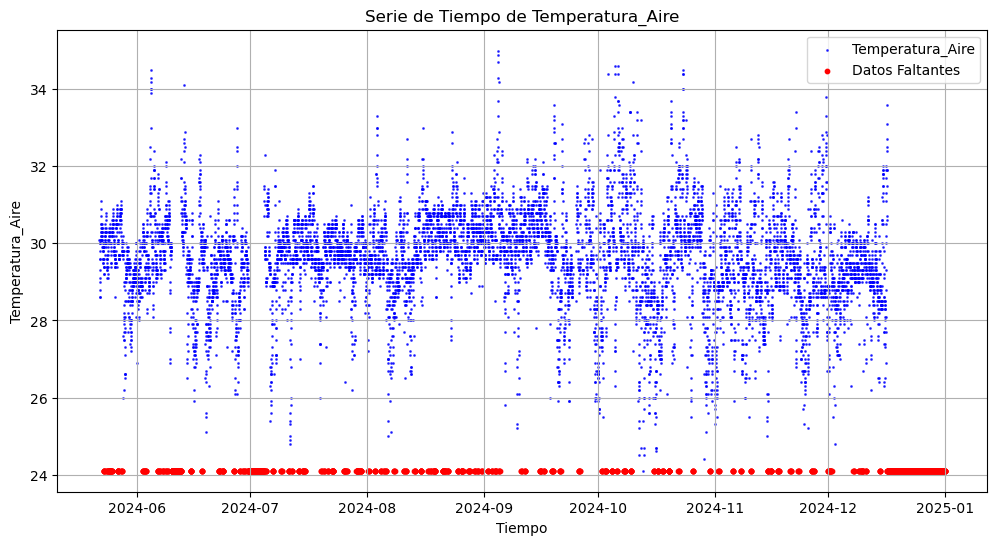

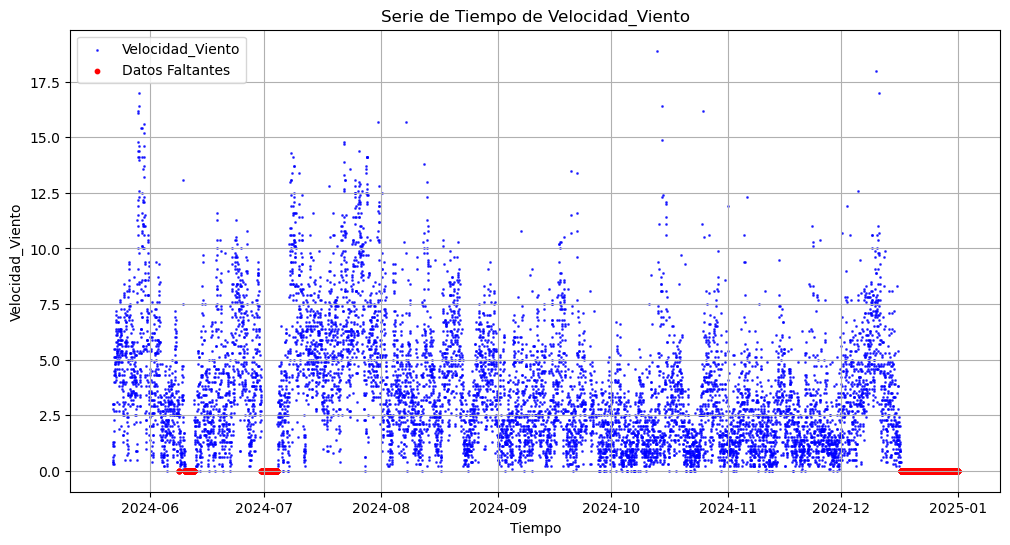

In [37]:



# Convertir la columna de tiempo a formato de fecha (si aplica)
bd_modificada['Tiempo'] = pd.to_datetime(bd_modificada['Tiempo'])

# Crear gráficos de series de tiempo con puntos NaN en color rojo
for column in bd_modificada.columns[1:]:  # Omitir la columna de tiempo
    plt.figure(figsize=(12, 6))
    
    # Graficar los valores normales en azul
    plt.scatter(
        bd_modificada['Tiempo'][~bd_modificada[column].isna()], 
        bd_modificada[column][~bd_modificada[column].isna()], 
        s=1, alpha=0.7, label=column, color='blue'
    )
    
    # Graficar los valores NaN en rojo
    nan_indices = bd_modificada[column].isna()
    plt.scatter(
        bd_modificada['Tiempo'][nan_indices], 
        [bd_modificada[column].min()] * sum(nan_indices),  # Ubicar NaN en el mínimo de la variable
        s=10, color='red', label='Datos Faltantes'
    )
    
    plt.xlabel('Tiempo')
    plt.ylabel(column)
    plt.title(f'Serie de Tiempo de {column}')
    plt.legend()
    plt.grid(True)
    plt.show()
